In [7]:
import pandas as pd
import seaborn as sns
sns.set()

In [4]:
combo = pd.read_csv('../../../Data/Combo_4_DropNAs.csv')

In [5]:
combo.dtypes

Risk_Score           float64
DI                   float64
Loan Type             object
Employment Length     object
Accepted               int64
dtype: object

In [6]:
combo.describe()

,Risk_Score,DI,Accepted
count,1.110595e+07,1.110595e+07,1.110595e+07
mean,6.412543e+02,inf,1.903265e-01
std,8.703329e+01,NaN,3.925587e-01
min,0.000000e+00,-1.000000e-02,0.000000e+00
25%,6.040000e+02,9.990000e-02,0.000000e+00
50%,6.530000e+02,2.031000e-01,0.000000e+00
75%,6.870000e+02,3.455000e-01,0.000000e+00
max,9.900000e+02,inf,1.000000e+00


<AxesSubplot:xlabel='Accepted', ylabel='Count'>

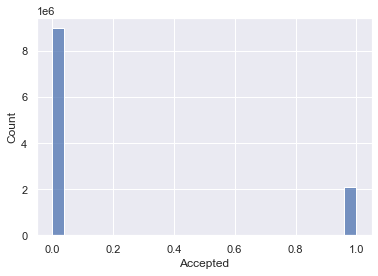

In [8]:
sns.histplot(data=combo, x='Accepted')

In [9]:
few = combo.groupby('Accepted', group_keys=False).apply(lambda x: x.sample(frac=0.001))

In [10]:
few.describe()

,Risk_Score,DI,Accepted
count,11106.000000,11106.000000,11106.000000
mean,641.458536,0.988753,0.190348
std,85.626227,24.654257,0.392593
min,0.000000,-0.010000,0.000000
25%,604.000000,0.098200,0.000000
50%,653.000000,0.202701,0.000000
75%,687.000000,0.345800,0.000000
max,964.000000,1999.980000,1.000000


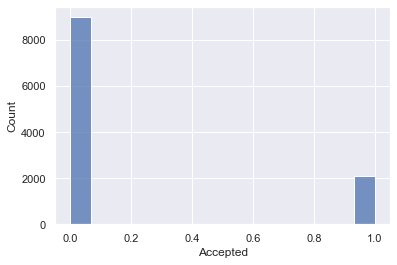

In [12]:
sns.histplot(data=few, x='Accepted');

In [13]:
few.isna().sum()

Risk_Score           0
DI                   0
Loan Type            0
Employment Length    0
Accepted             0
dtype: int64

In [15]:
few.head(2)

,Risk_Score,DI,Loan Type,Employment Length,Accepted
8155749,628.0,0.4302,Other,< 1 year,0
3859825,691.0,0.3808,Debt Consolidation,< 1 year,0


In [14]:
from pycaret.classification import *

In [16]:
experiment = setup(data = few, target = 'Accepted', categorical_features = ['Employment Length', 'Loan Type'])

,Description,Value
0,session_id,3457
1,Target,Accepted
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(11106, 5)"
5,Missing Values,False
6,Numeric Features,2
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


In [17]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.9627,0.9908,0.8932,0.9086,0.9005,0.8776,0.8779,0.0870
catboost,CatBoost Classifier,0.9627,0.9896,0.8905,0.9110,0.9003,0.8774,0.8777,0.4710
knn,K Neighbors Classifier,0.9521,0.9770,0.8865,0.8648,0.8754,0.8458,0.8460,0.0450
ada,Ada Boost Classifier,0.9461,0.9786,0.8742,0.8474,0.8600,0.8267,0.8273,0.0750
gbc,Gradient Boosting Classifier,0.9451,0.9777,0.8864,0.8350,0.8595,0.8254,0.8263,0.1720
rf,Random Forest Classifier,0.9367,0.9707,0.8470,0.8244,0.8352,0.7961,0.7965,0.1150
lr,Logistic Regression,0.9348,0.9602,0.8470,0.8163,0.8310,0.7906,0.7911,0.3660
dt,Decision Tree Classifier,0.9317,0.8906,0.8246,0.8170,0.8205,0.7783,0.7785,0.0230
et,Extra Trees Classifier,0.9275,0.9586,0.8239,0.8000,0.8113,0.7664,0.7669,0.1200
ridge,Ridge Classifier,0.9272,0.0000,0.8293,0.7953,0.8116,0.7665,0.7670,0.0190


In [18]:
models()

,Name,Reference,Turbo
ID,,,
lr,Logistic Regression,sklearn.linear_model._logistic.LogisticRegression,True
knn,K Neighbors Classifier,sklearn.neighbors._classification.KNeighborsCl...,True
nb,Naive Bayes,sklearn.naive_bayes.GaussianNB,True
dt,Decision Tree Classifier,sklearn.tree._classes.DecisionTreeClassifier,True
svm,SVM - Linear Kernel,sklearn.linear_model._stochastic_gradient.SGDC...,True
rbfsvm,SVM - Radial Kernel,sklearn.svm._classes.SVC,False
gpc,Gaussian Process Classifier,sklearn.gaussian_process._gpc.GaussianProcessC...,False
mlp,MLP Classifier,sklearn.neural_network._multilayer_perceptron....,False
ridge,Ridge Classifier,sklearn.linear_model._ridge.RidgeClassifier,True


In [19]:
nb = create_model('nb')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.2262,0.5550,0.9932,0.1954,0.3266,0.0159,0.0815
1,0.2635,0.5707,1.0000,0.2042,0.3391,0.0368,0.1370
2,0.2237,0.5707,1.0000,0.1957,0.3274,0.0166,0.0915
3,0.2494,0.5690,1.0000,0.2022,0.3364,0.0291,0.1215
4,0.2420,0.5579,1.0000,0.1997,0.3330,0.0257,0.1140
5,0.2162,0.5667,1.0000,0.1944,0.3256,0.0129,0.0805
6,0.2484,0.5565,1.0000,0.2011,0.3349,0.0289,0.1212
7,0.2227,0.5577,1.0000,0.1957,0.3274,0.0160,0.0899
8,0.2317,0.5538,1.0000,0.1976,0.3300,0.0205,0.1017


In [20]:
print(nb)

GaussianNB(priors=None, var_smoothing=1e-09)


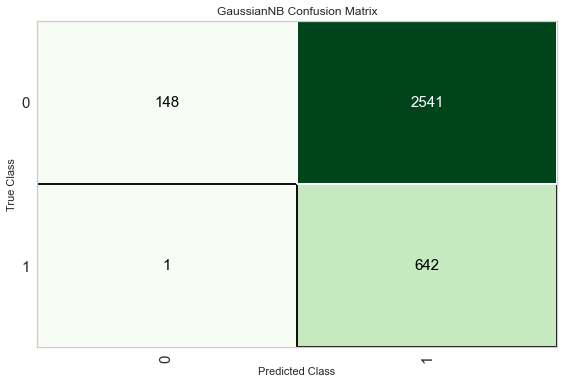

In [21]:
plot_model(nb, plot='confusion_matrix')

In [22]:
plot_model(nb, plot='feature')

TypeError: Feature Importance and RFE plots not available for estimators that doesnt support coef_ or feature_importances_ attribute.